#### Author: Akshatha K Vydula, ASU
#### Date last modified: Oct 29, 2021
#### Project: Beam mapping using Pulsar holography


This notebook reads the .ms files binned based on pulsar par file (smaller .ms files with limited baselines to reduce the reading time), averages the autocorrelations in each bin and then shows the dependence on time and frequencies over the bins.

In [1]:
%matplotlib inline
#Import needed packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
from pyuvdata import UVData
from mpl_toolkits import mplot3d
import pyuvdata
uvd = UVData()

Set the number of bins (64, always) select the antennas:

28--> LWA1
29--> LWA-SV
1 --> VLA1

The files have (28,28), (29,29), (1,1), (28,1).

In [2]:
bins =64
ant1= 28
ant2 =28

Read a test file to get basic uvd parameters

In [3]:
uvd.read('/data4/vydula/ovro_lwa/data2021/selected_baselines_pulsar_ms_files/small_bin_00.ms')

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.2528699319387 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.


In [4]:
#uvd.get_flags([ant1,ant2,'xx']).shape


Pull out length of time, frequency and data arrays.

In [5]:
Ntimes=(uvd.Ntimes)
Nfreqs=(uvd.Nfreqs)
freq_array = uvd.freq_array[0]/1e6
time_array= uvd.time_array
data = np.zeros((bins,Ntimes, Nfreqs))

This for loop reads one file at a time, pulls out the autos/crosses of the selected antennas and stores in 3D data array

In [6]:
for i in (range(bins)):
    bin_num = f"{i:02}"
    file_name = '/data4/vydula/ovro_lwa/data2021/selected_baselines_pulsar_ms_files/small_bin_'+bin_num+'.ms'
    uvd.read(file_name)
    #flag= uvd.get_flags([ant1,ant2,'xx'])[0:Ntimes,0:Nfreqs]
    data[i,:,:]=np.abs(uvd.get_data([ant1,ant2,'xx'])[0:Ntimes,0:Nfreqs])


The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.2528699319387 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.252879327045 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.253127215018 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.2531089656022 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not

The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.253223024497 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.2531158091047 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.252718613814 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not match the expected values given the antenna positions. The largest discrepancy is 1807.2522088807063 meters. This is a fairly common situation but might indicate an error in the antenna positions, the uvws or the phasing.
The uvw_array does not

In [7]:
data.shape


(64, 270, 519)

#### 1. Freq Average (to get bin vs time plot)

In [8]:
freq_avg=np.mean(data, axis=2)
print(freq_avg.shape)

(64, 270)


shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0, 0.5, 'Avg')

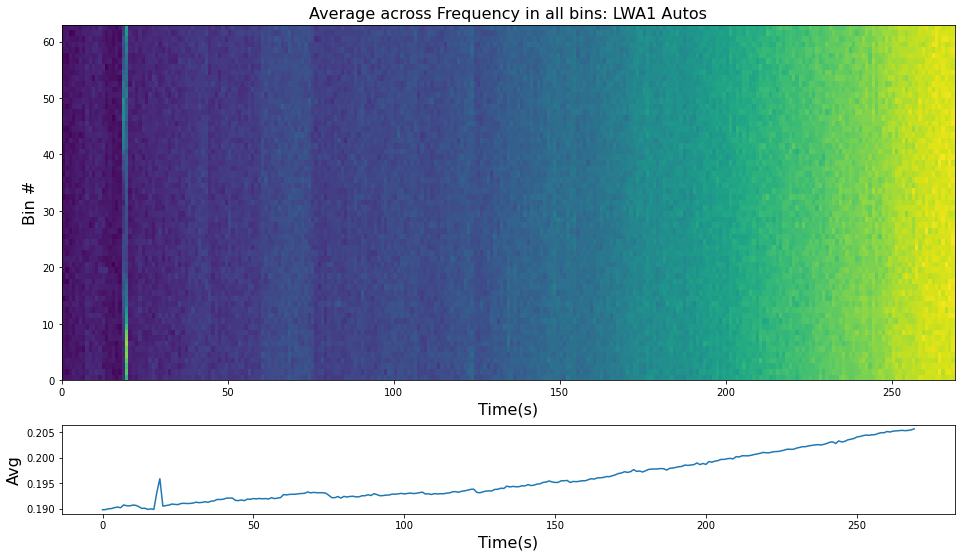

In [25]:
fig, axs = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [4, 1]})


axs[0].pcolormesh(np.arange(Ntimes), np.arange(64),freq_avg)
axs[0].set_xlabel('Time(s)', fontsize=16)
axs[0].set_ylabel('Bin #', fontsize=16)
axs[0].set_title('Average across Frequency in all bins: LWA1 Autos', fontsize=16)

axs[1].plot(np.arange(Ntimes), np.mean(freq_avg, axis=0))
axs[1].set_xlabel('Time(s)', fontsize=16)
axs[1].set_ylabel('Avg', fontsize=16)

#plt.savefig('/data4/vydula/ovro_lwa/plots/avg_freq_all_bins_lwa1.jpeg')

#### 2. Time Average (to get bin vs Frequency plot)

In [10]:
time_avg=(np.mean(data, axis=1))
print(time_avg.shape)  

(64, 519)


shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


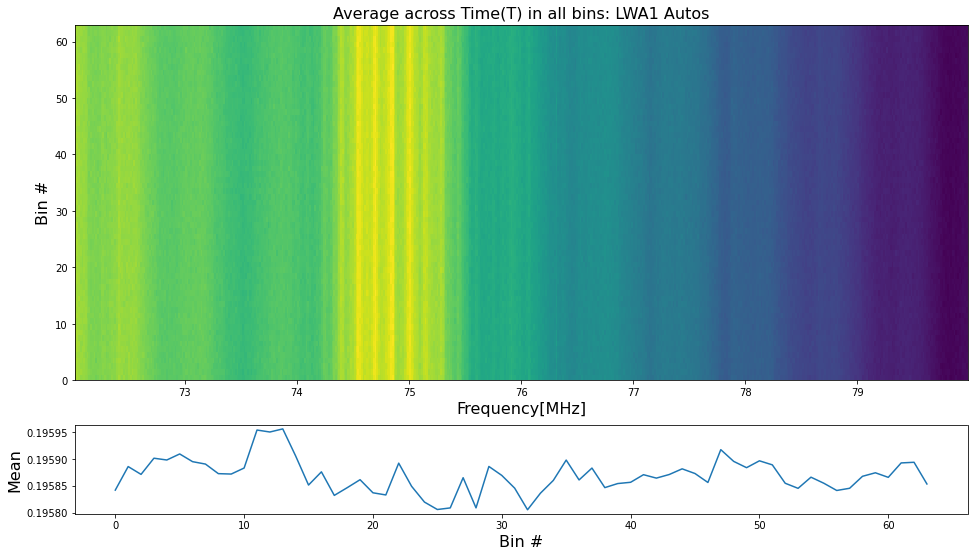

In [26]:

fig, axs = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [4, 1]})


axs[0].pcolormesh(freq_array, np.arange(64),time_avg)
axs[0].set_xlabel('Frequency[MHz]', fontsize=16)
axs[0].set_ylabel('Bin #', fontsize=16)
axs[0].set_title('Average across Time(T) in all bins: LWA1 Autos', fontsize=16)

axs[1].plot(np.arange(64), np.mean(time_avg, axis=1))
axs[1].set_xlabel('Bin #', fontsize=16)
axs[1].set_ylabel('Mean', fontsize=16)

plt.savefig('/data4/vydula/ovro_lwa/plots/avg_time_all_bins_lwa1.jpeg')

Looks like there is RFI at ~75MHz. Slice the data to a smaller frequency bin

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0, 0.5, 'Mean')

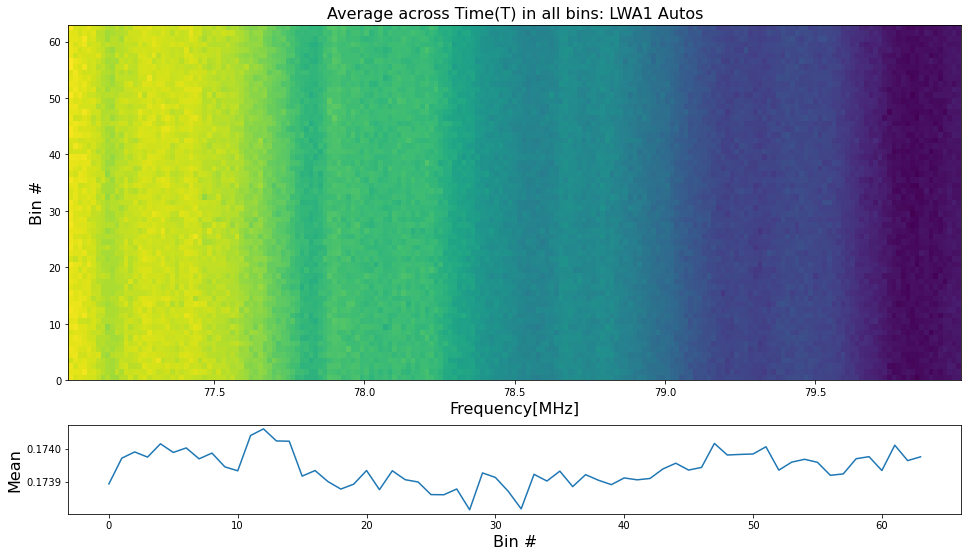

In [27]:
mask = np.where(freq_array>77)

time_avg_high_freq = time_avg[:,mask[0]]

fig, axs = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [4, 1]})


axs[0].pcolormesh(freq_array[mask], np.arange(64),time_avg_high_freq)
#plt.colorbar(im)
axs[0].set_xlabel('Frequency[MHz]', fontsize=16)
axs[0].set_ylabel('Bin #', fontsize=16)
axs[0].set_title('Average across Time(T) in all bins: LWA1 Autos', fontsize=16)

axs[1].plot(np.arange(64), np.mean(time_avg_high_freq, axis=1))
axs[1].set_xlabel('Bin #', fontsize=16)
axs[1].set_ylabel('Mean', fontsize=16)




Every bin has bandpass feature which needs to be subtracted. To do this, 
1. calculate the mean across all the bins at each frequency
2. duplicate it to the size of the 2D matrix (bin vs freq) [I am using np.tile for this]
3. subtract from the time averaged autos

Text(0, 0.5, 'Bandpass feature [to be subtracted]')

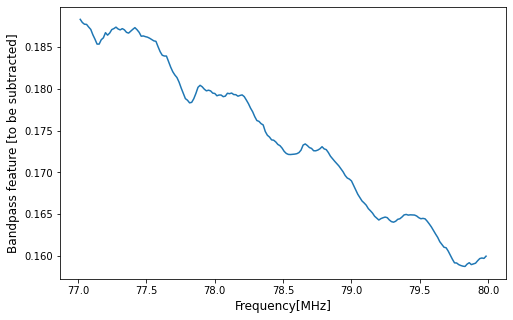

In [32]:
#step1: calculate the mean across all the bins at each frequency
plt.figure(figsize=(8,5))
plt.plot(freq_array[mask[0]],np.mean(time_avg[:,mask[0]], axis=0))
plt.xlabel('Frequency[MHz]', fontsize=12)
plt.ylabel('Bandpass feature [to be subtracted]', fontsize=12)

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


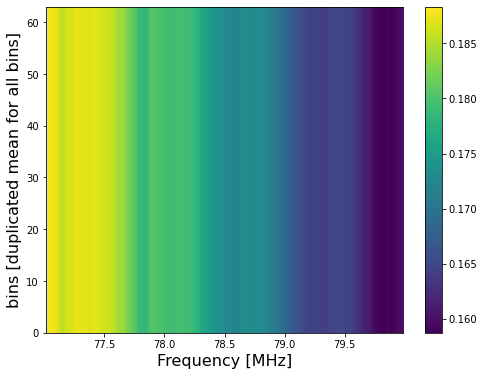

In [34]:
#step2:duplicate it to the size of the 2D matrix (bin vs freq)
plt.figure(figsize=(8,6))
plt.pcolormesh(freq_array[mask[0]], np.arange(64),np.tile(np.mean(time_avg[:,mask[0]], axis=0), (64, 1)))
plt.xlabel('Frequency [MHz]', fontsize=16)
plt.ylabel('bins [duplicated mean for all bins]', fontsize=16)
plt.colorbar()

In [15]:
#step3: subtract from time_avg
new_time_avg = time_avg[:,mask[0]]-np.tile(np.mean(time_avg[:,mask[0]], axis=0), (64, 1))


shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0, 0.5, 'Mean')

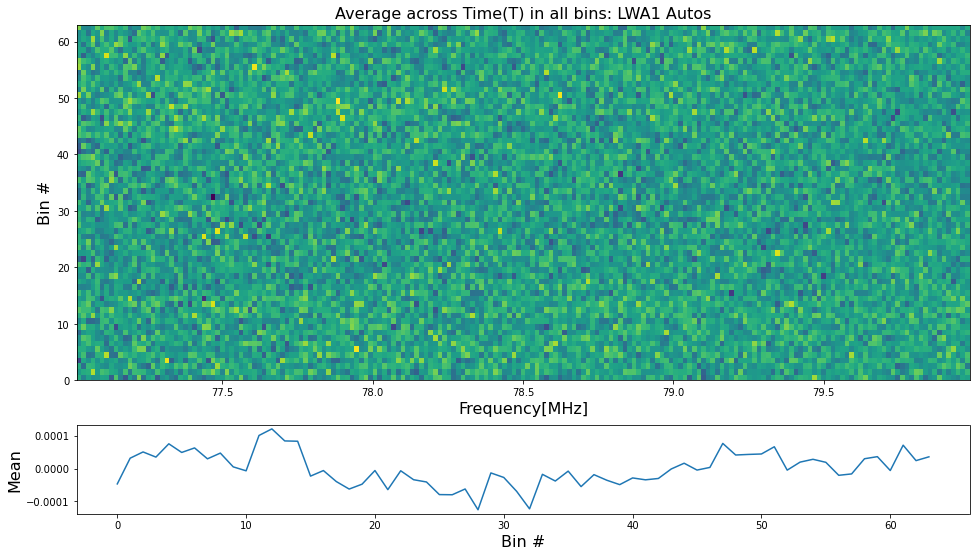

In [36]:
fig, axs = plt.subplots(2,1,figsize=(16,9), gridspec_kw={'height_ratios': [4, 1]})


axs[0].pcolormesh(freq_array[mask[0]], np.arange(64),new_time_avg)
axs[0].set_xlabel('Frequency[MHz]', fontsize=16)
axs[0].set_ylabel('Bin #', fontsize=16)
axs[0].set_title('Average across Time(T) in all bins: LWA1 Autos', fontsize=16)

axs[1].plot(np.arange(64), np.mean(new_time_avg, axis=1))
axs[1].set_xlabel('Bin #', fontsize=16)
axs[1].set_ylabel('Mean', fontsize=16)



shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


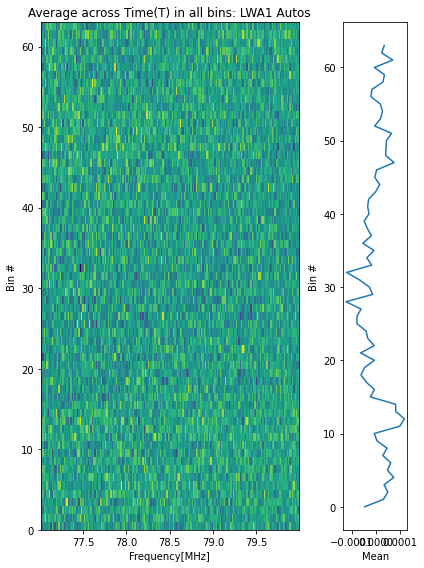

In [20]:
#tilted plot for fun
fig, axs = plt.subplots(1,2,figsize=(6,8), gridspec_kw={'width_ratios': [4, 1]})


axs[0].pcolormesh(freq_array[mask[0]], np.arange(64),new_time_avg)
axs[0].set_xlabel('Frequency[MHz]')
axs[0].set_ylabel('Bin #')
axs[0].set_title('Average across Time(T) in all bins: LWA1 Autos')

axs[1].plot(np.mean(new_time_avg, axis=1),np.arange(64))
#axs[1].vlines(x=np.mean(a, axis=1), ymin=0, ymax=63,color='r', linestyle='--',label='Mean')
axs[1].set_ylabel('Bin #')
axs[1].set_xlabel('Mean')
#axs[1].legend()
plt.tight_layout()

#plt.savefig('/data4/vydula/ovro_lwa/plots/mean_subtracted_power_lwa1_autos.jpeg')